# **Problem Statement**

## Business Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62 bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert

## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* **ID**: ID of the lead.
* **age**: Age of the lead.
* **current_occupation**: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'.
* **first_interaction**: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'.
* **profile_completed**: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%).
* **website_visits**: How many times has a lead visited the website.
* **time_spent_on_website**: Total time spent on the website in seconds.
* **page_views_per_visit**: Average number of pages on the website viewed during the visits.
* **last_activity**: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc.
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc.
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc.

* **print_media_type1**: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* **print_media_type2**: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* **digital_media**: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* **educational_channels**: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral**: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status**: Flag indicating whether the lead was converted to a paid customer or not.


# **Installing and Importing the Necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
gradio 5.47.2 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.30.1 which is incompatible.
transformers 4.56.2 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.
google-adk 1.15.1 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
diffusers 0.35.1 requires huggingface-hub>=0.34.0, but you have huggingface

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#install streamlit
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.3 MB/s eta 0:00:00


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
import sklearn
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn import metrics

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

#streamlit
import streamlit as st

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read data
data = pd.read_csv('/content/drive/My Drive/AI Cert Course/Model Deployment/Project 7/ExtraaLearn.csv')

In [ ]:
#make copy of data to avoid changing original
df = data.copy()

## **Overview of the dataset**

In [ ]:
#check the first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
#check the last 5 rows
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
#check the dataset's shape
df.shape

(4612, 15)

There are 15 columns and 4,612 rows.

In [ ]:
#check column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

There are 10 object columns and 5 numerical columns, with 4 integer columns and 1 float column.

Object columns:
* ID
* current_occupation
* first_interaction
* profile_completed
* last_activity
* print_media_type1
* print_media_type2
* digital_media
* educational_channels
* referral


Numerical columns:
* age
* website_visits
* time_spent_on_website
* page_views_per_visit
* status

In [ ]:
#check for duplicates
int(df.duplicated().sum())

0

There are no duplicates.

In [ ]:
#check for null values
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


There are no null values -- this was also confirmed when we called df.info().

# **Exploratory Data Analysis**

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [ ]:
#check statistical summary of the data
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT4612,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Ages range from 18 to 63, with the average age around 46.
* There are 3 "current occupation" values, with "professional" being the most common.
* There are 2 "first interaction" values, with most people having their first interaction online.
* There are 3 "profile completed" values, with most people having completed most of the online profile.
* The number of website visits range from 0 to 30, with the average person having made just over 3 visits to the website.
* The time spent on the website ranges from 0 to 2,537 seconds, with the average being 724 seconds.
* The page views per visit range from 0 to over 18, with the average being just over 3.
* There are 3 values for "last activity", with the most common being email activity.
* There are 2 values for print_media_type1 and print_media_type2, with the top value for both being no.
* There are 2 values for digital media, with the top value being no.
* There are 2 values for educational channels, with the top value being no.
* There are 2 values for referral, wtih the top value being no.
* Status is a numerical column and has values ranging from 0 to 1, with the average being 0.29, or closer to "0".

### Univariate Analysis

Object columns:
* ID
* current_occupation
* first_interaction
* profile_completed
* last_activity
* print_media_type1
* print_media_type2
* digital_media
* educational_channels
* referral


Numerical columns:
* age
* website_visits
* time_spent_on_website
* page_views_per_visit
* status

#### Current Occupation

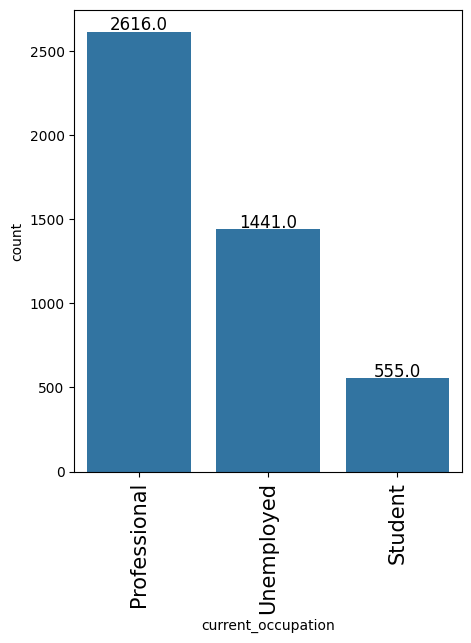

In [ ]:
labeled_barplot(df, 'current_occupation')

Most leads are professionals, followed by people who are unemployed, followed by students. There are almost twice as many professionals as people who are unemployed among the leads, and almost five times as many professionals as students.

#### First Interaction

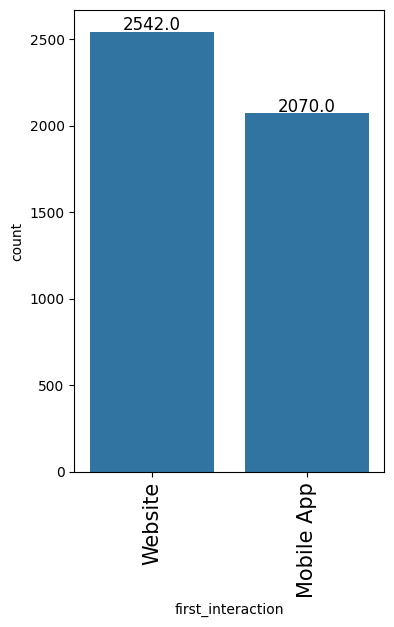

In [ ]:
labeled_barplot(df, 'first_interaction')

Most leads had their first interaction via the website.

#### Profile Completed

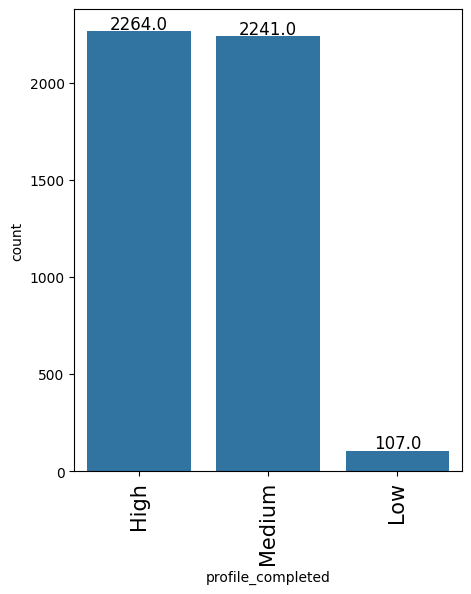

In [ ]:
labeled_barplot(df, 'profile_completed')

Most leads have completed most of the profile, with a small percentage having done little profile completion.

#### Last Activity

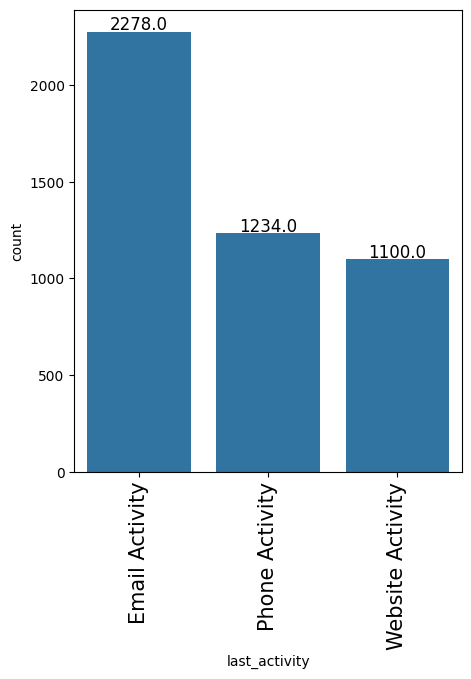

In [ ]:
labeled_barplot(df, 'last_activity')

Most leads had their last activity via email, followed by call/text activity, followed by website activity.

#### Print Media Type 1 (newspaper)

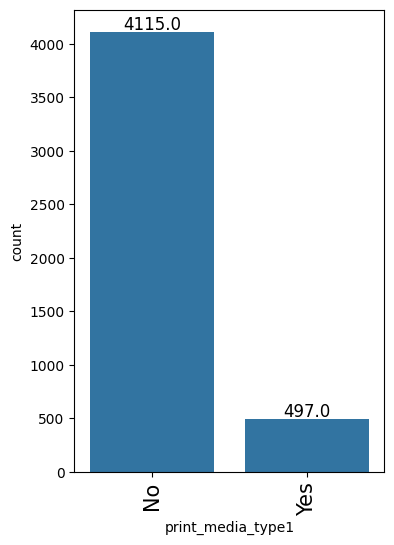

In [ ]:
labeled_barplot(df, 'print_media_type1')

Most leads did not see the ad in the newspaper.

#### Print Media Type 2 (magazine)

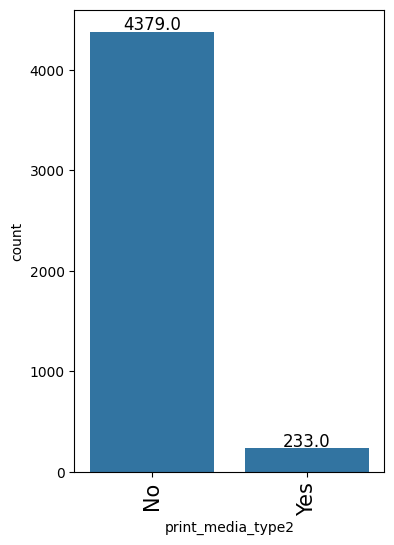

In [ ]:
labeled_barplot(df, 'print_media_type2')

Most leads did not see the ad in the magazine.

#### Digital Media

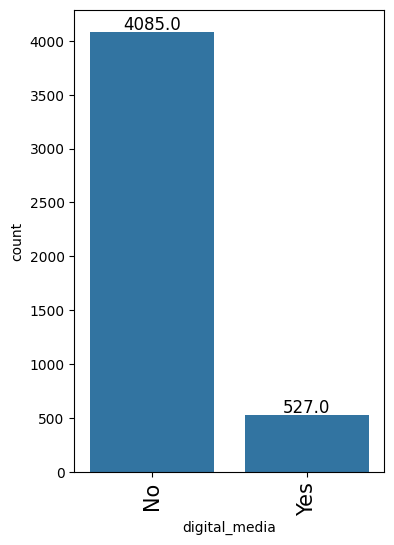

In [ ]:
labeled_barplot(df, 'digital_media')

Most leads did not see the ad on digital media.

#### Educational Channels

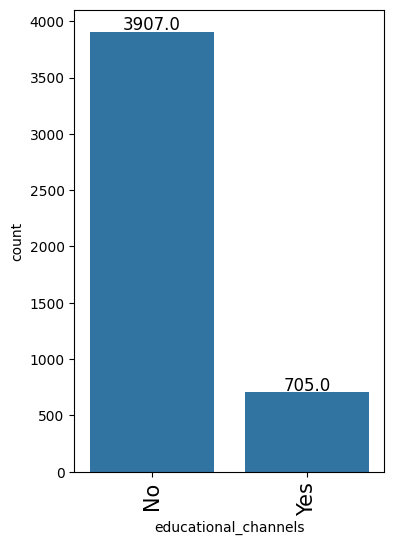

In [ ]:
labeled_barplot(df, 'educational_channels')

Most leads did not see the ad on educational channels.

#### Referral

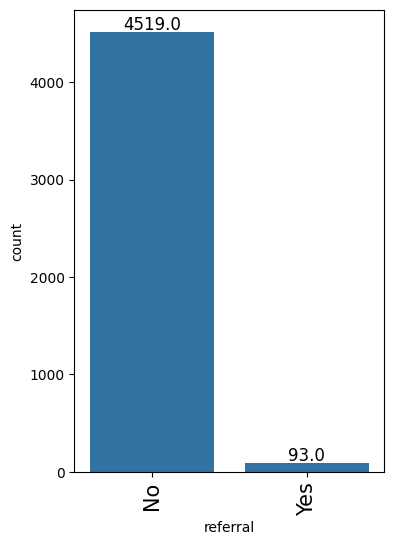

In [ ]:
labeled_barplot(df, 'referral')

Most leads did not get referred.

#### Age

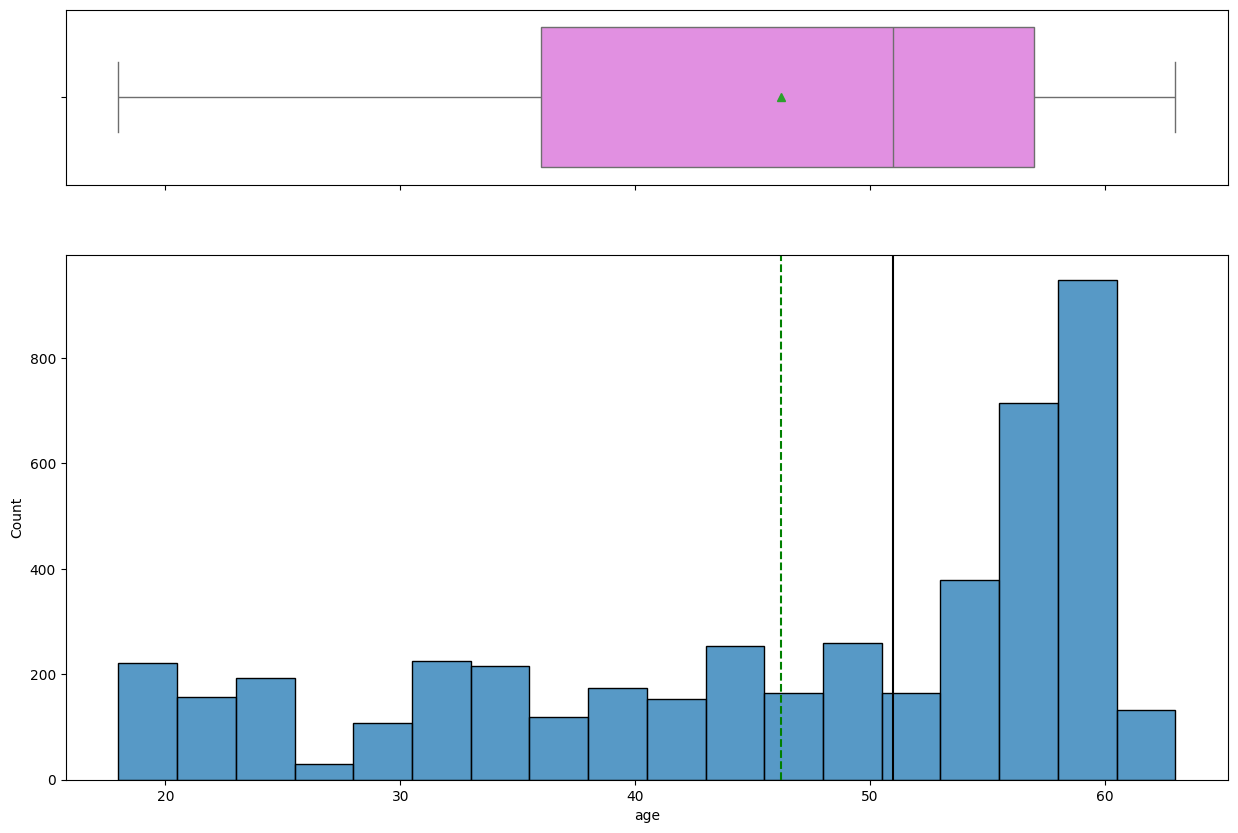

In [ ]:
histogram_boxplot(df, 'age')

Lead ages are left-skewed, with the median a little over 50 and the mean around 45. There are no outliers.

#### Website Visits

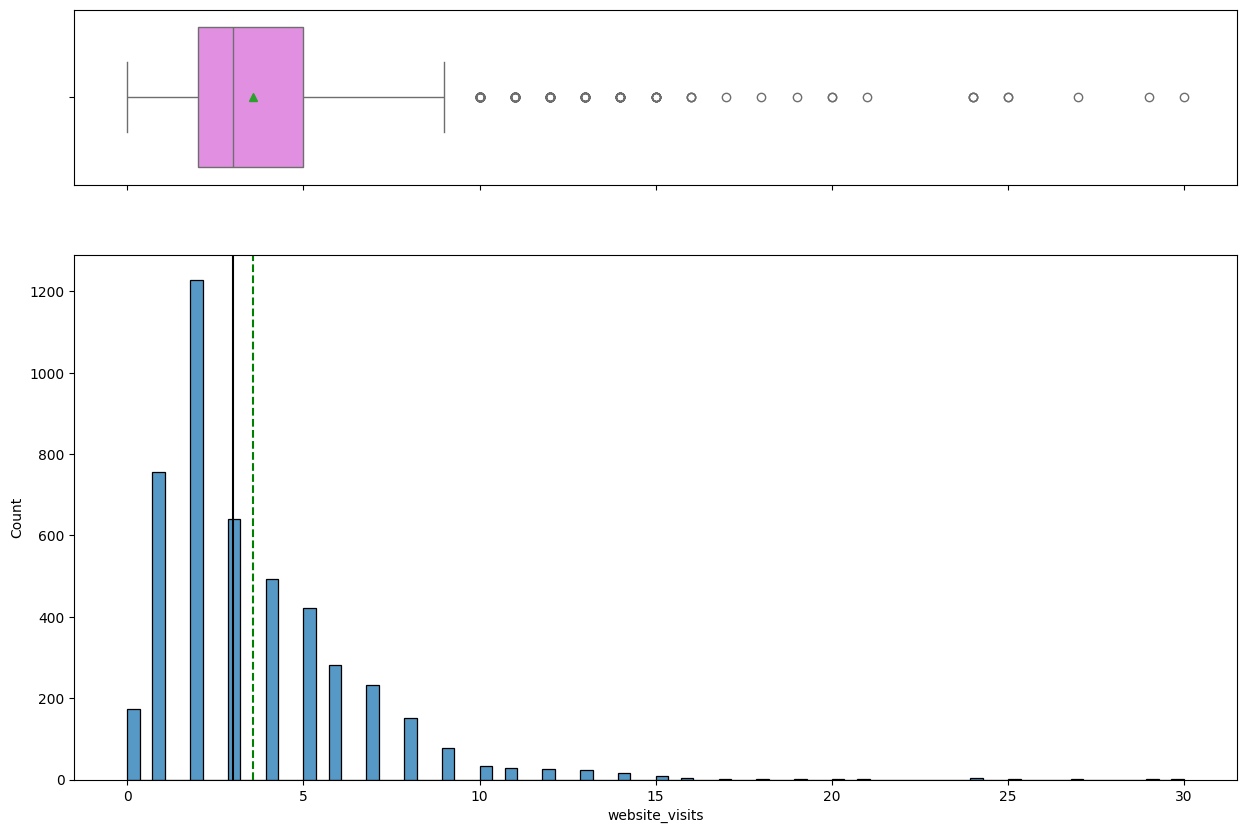

In [ ]:
histogram_boxplot(df, 'website_visits')

The website visits dataset is right-skewed with several outliers beyond about 9. The median is around 3 and the mean is a little under 4.

#### Time Spent on Website

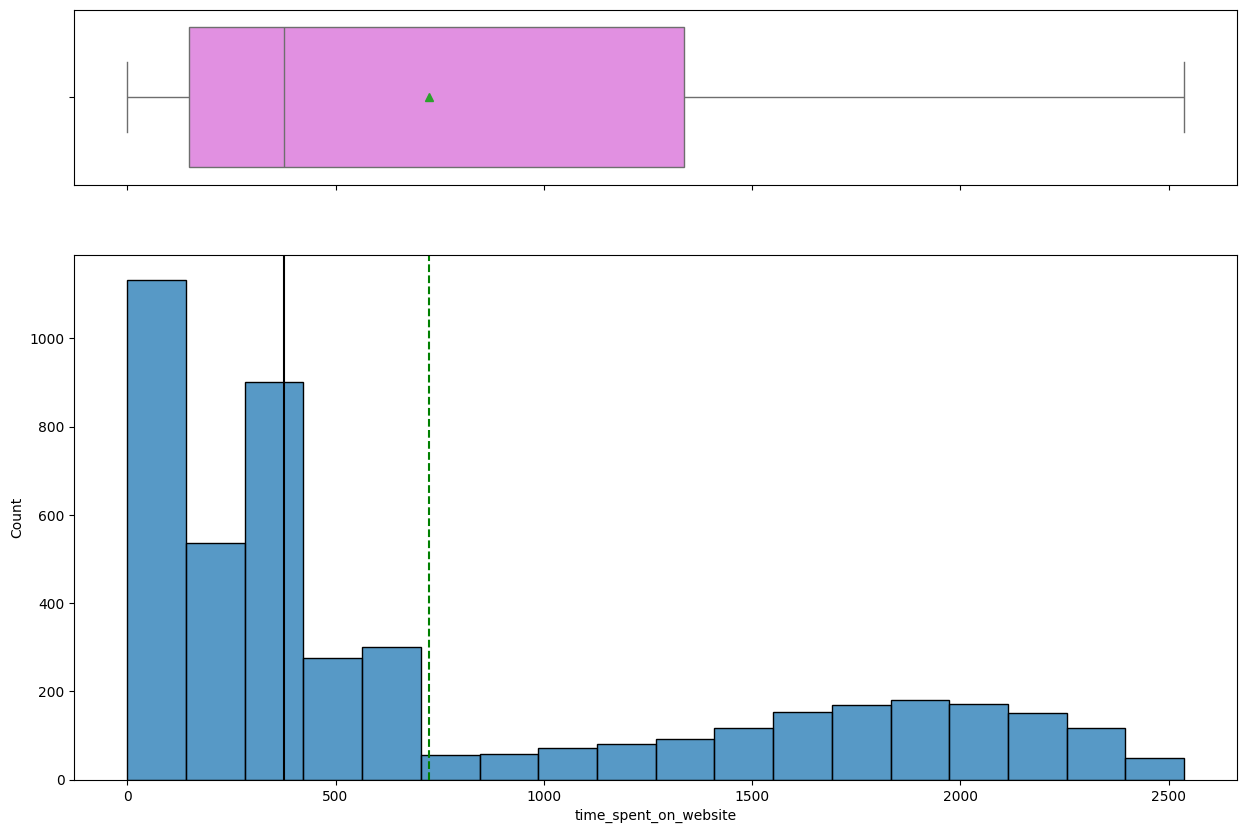

In [ ]:
histogram_boxplot(df, 'time_spent_on_website')

The time spent on website dataset is right skewed with no outliers. The median is around 400 and the mean is around 750.

#### Page Views per Visit

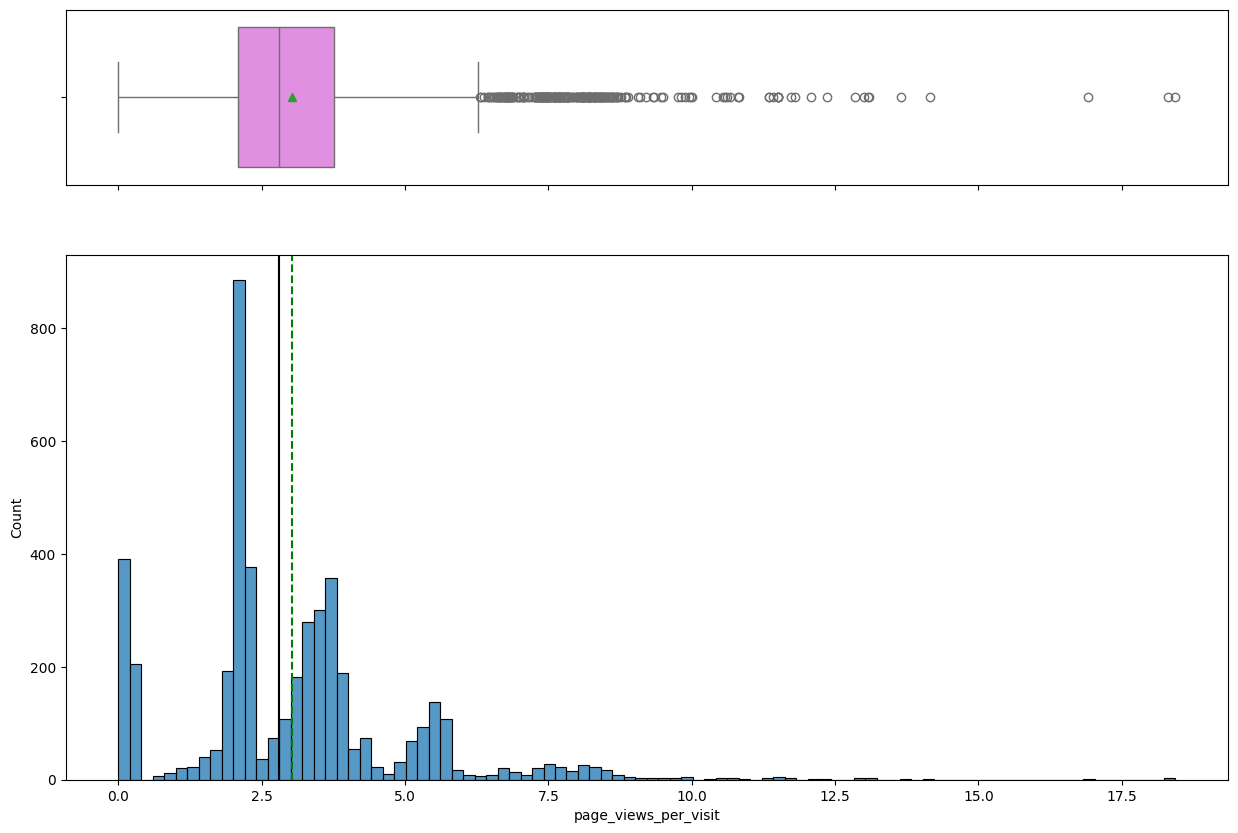

In [ ]:
histogram_boxplot(df, 'page_views_per_visit')

The page views per visit dataset is right skewed with many outliers. The median is around 3 and the mean is a little higher.

#### Status

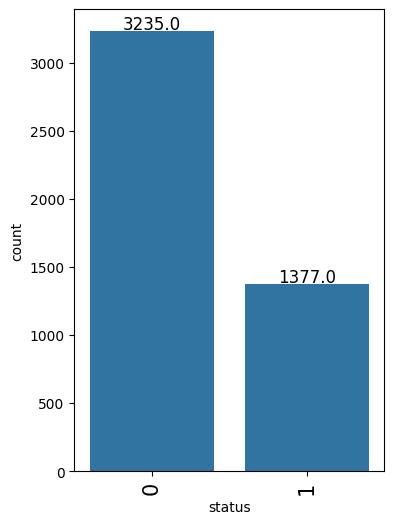

In [ ]:
labeled_barplot(df, 'status')

The target variable is imbalanced, with most leads not having been converted to paying customers. There are more than twice as many leads who aren't paying customers compared to leads who are paying customers.

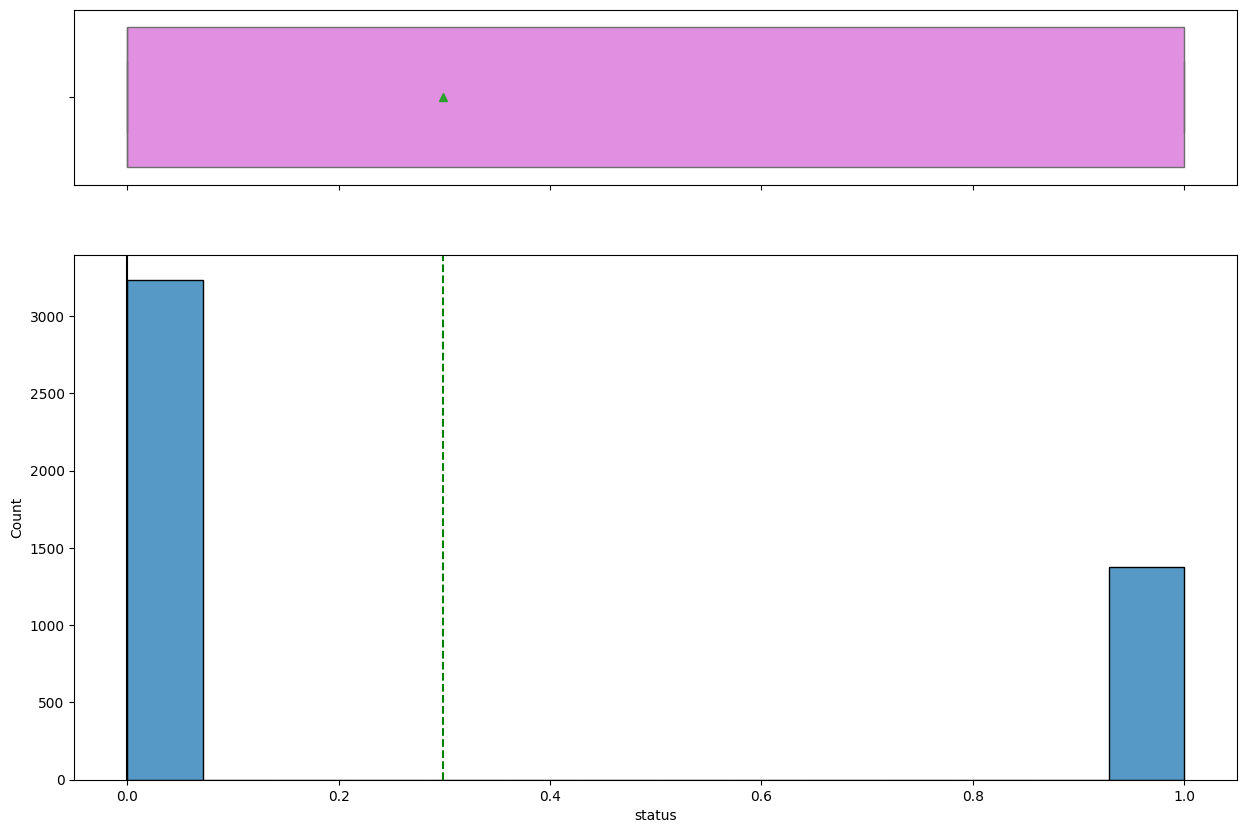

In [ ]:
histogram_boxplot(df, 'status')

Unsurprisingly, the "median" is 0 and the mean is closer to 0 than 1.  

### Bivariate Analysis

#### Current Occupation

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


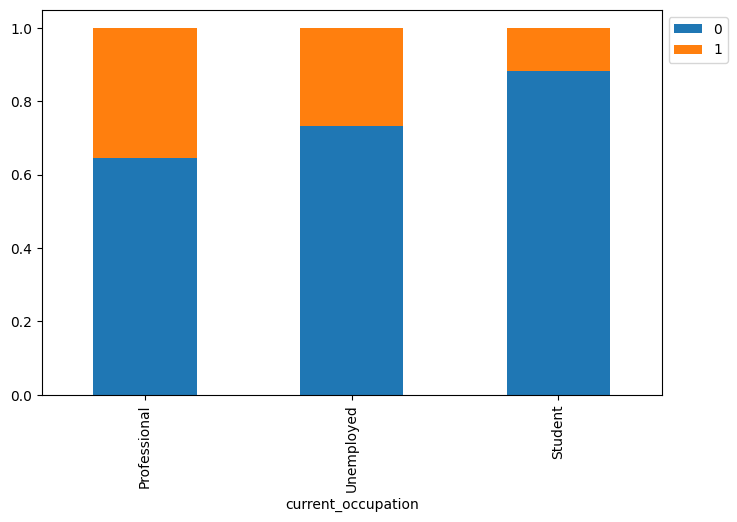

In [ ]:
stacked_barplot(df, 'current_occupation', 'status')

Professionals have the highest conversion rate, and students have the lowest.

#### First Interaction

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


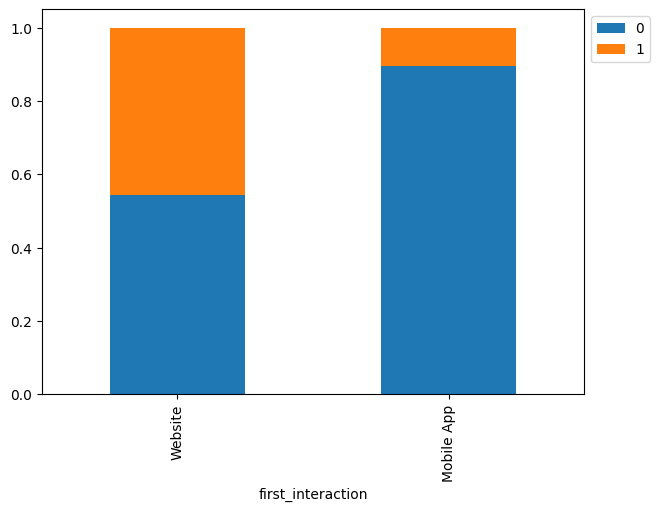

In [ ]:
stacked_barplot(df, 'first_interaction', 'status')

Leads who had their first interaction on the website have a higher conversion rate compared to leads who had their first interaction on the app.

#### Profile Completed

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


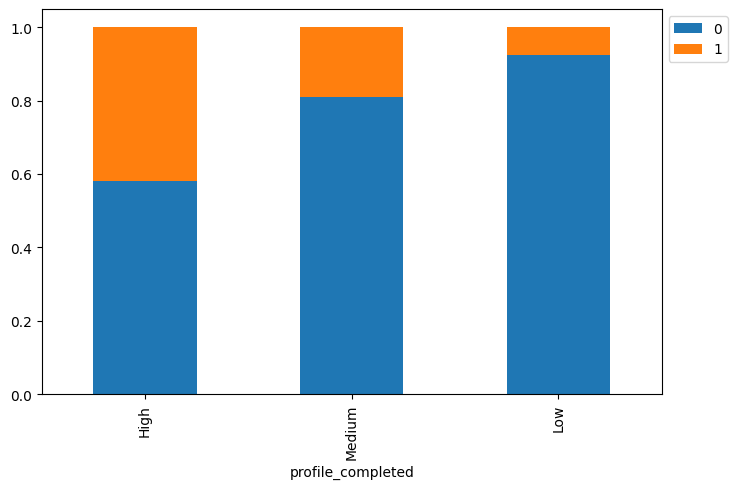

In [ ]:
stacked_barplot(df, 'profile_completed', 'status')

Leads who had a high amount of profile completion have the highest rate of conversion, and leads with a low amount of profile completion have the lowest.

#### Last Activity

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


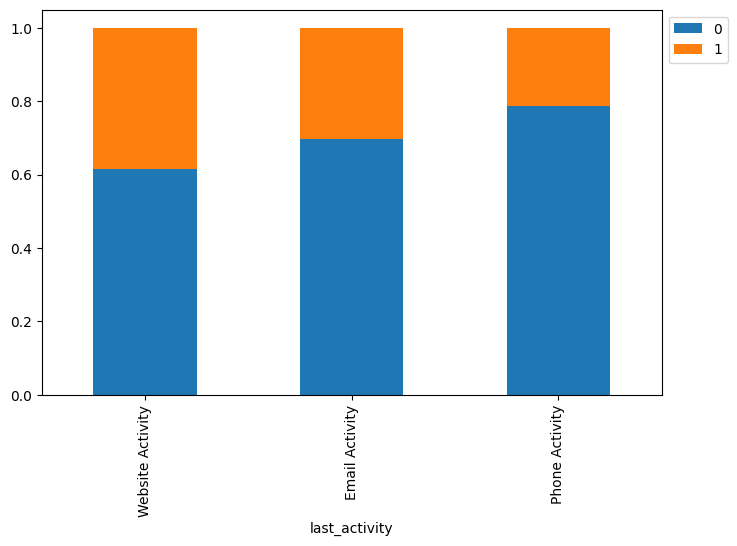

In [ ]:
stacked_barplot(df, 'last_activity', 'status')

Leads whose last actvitity was on the website have the highest conversion rate, and leads whose last activity was through the phone had the lowest.

#### Print Media Type 1

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


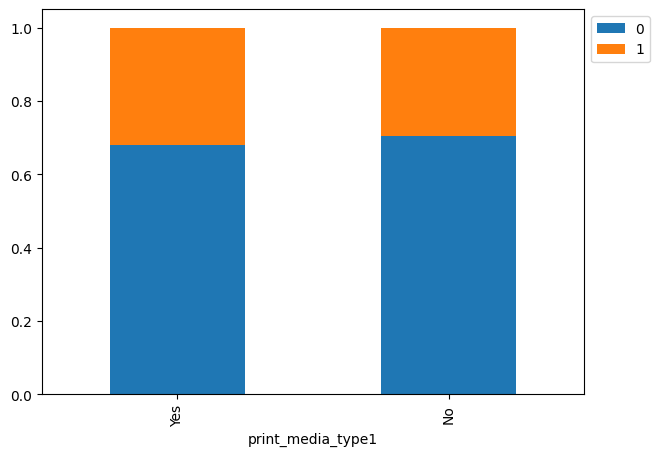

In [ ]:
stacked_barplot(df, 'print_media_type1', 'status')

The conversion rate is about the same among people who saw the ad in newspapers as it is among those who didn't.

#### Print Media Type 2

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


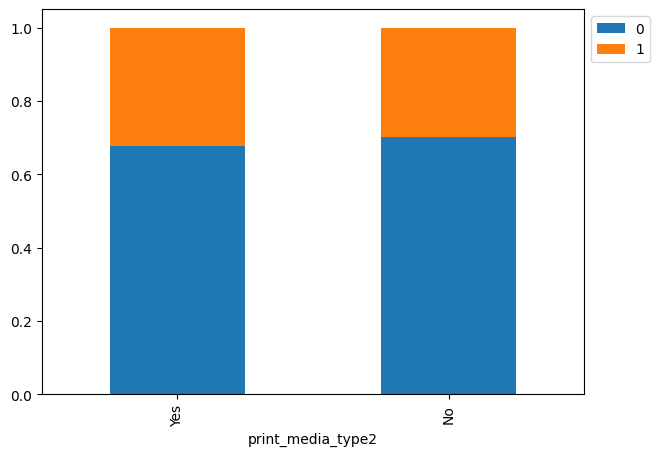

In [ ]:
stacked_barplot(df, 'print_media_type2', 'status')

The conversion rate is about the same among those who saw the ad in magazines as it is among those who didn't.

#### Digital Media

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


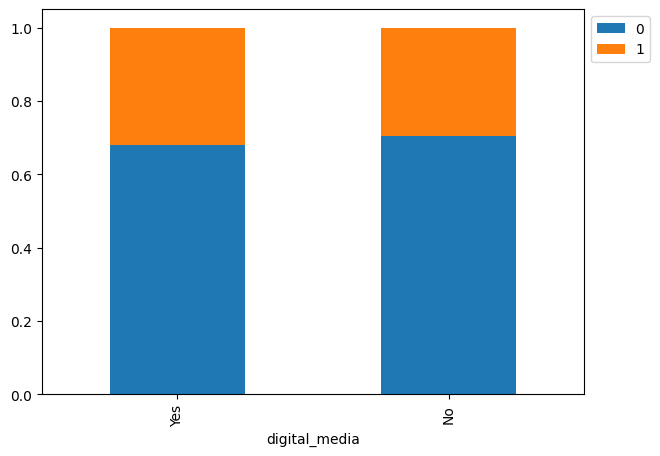

In [ ]:
stacked_barplot(df, 'digital_media', 'status')

The conversion rate is about the same among those who saw the digital media ads as it is among those who didn't.

#### Educational Channels

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


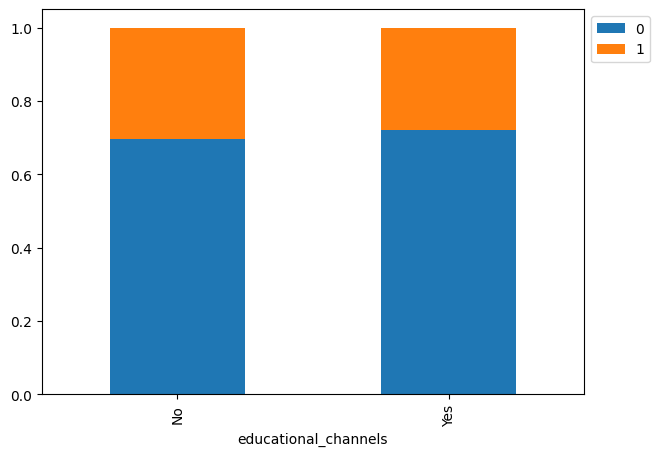

In [ ]:
stacked_barplot(df, 'educational_channels', 'status')

The conversion rate is about the same among those who saw the ad in educational channels as it is among those who didn't.

#### Referral

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


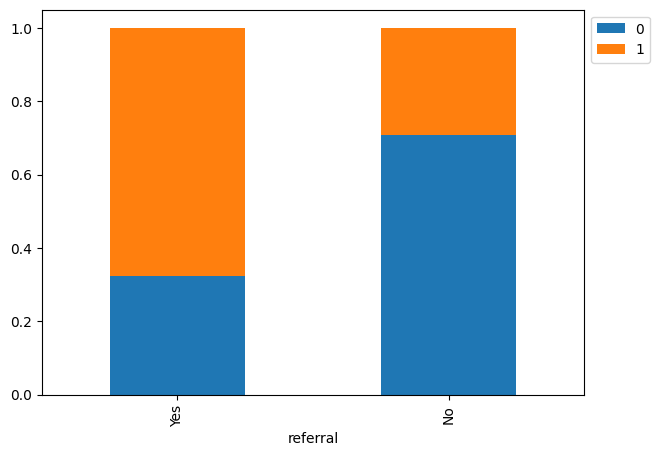

In [ ]:
stacked_barplot(df, 'referral', 'status')

There is a very high conversion rate among those who were referred compared to those who were not referred. It would appear that leads who were referred have a very high chance of becoming paying customers.

#### Age

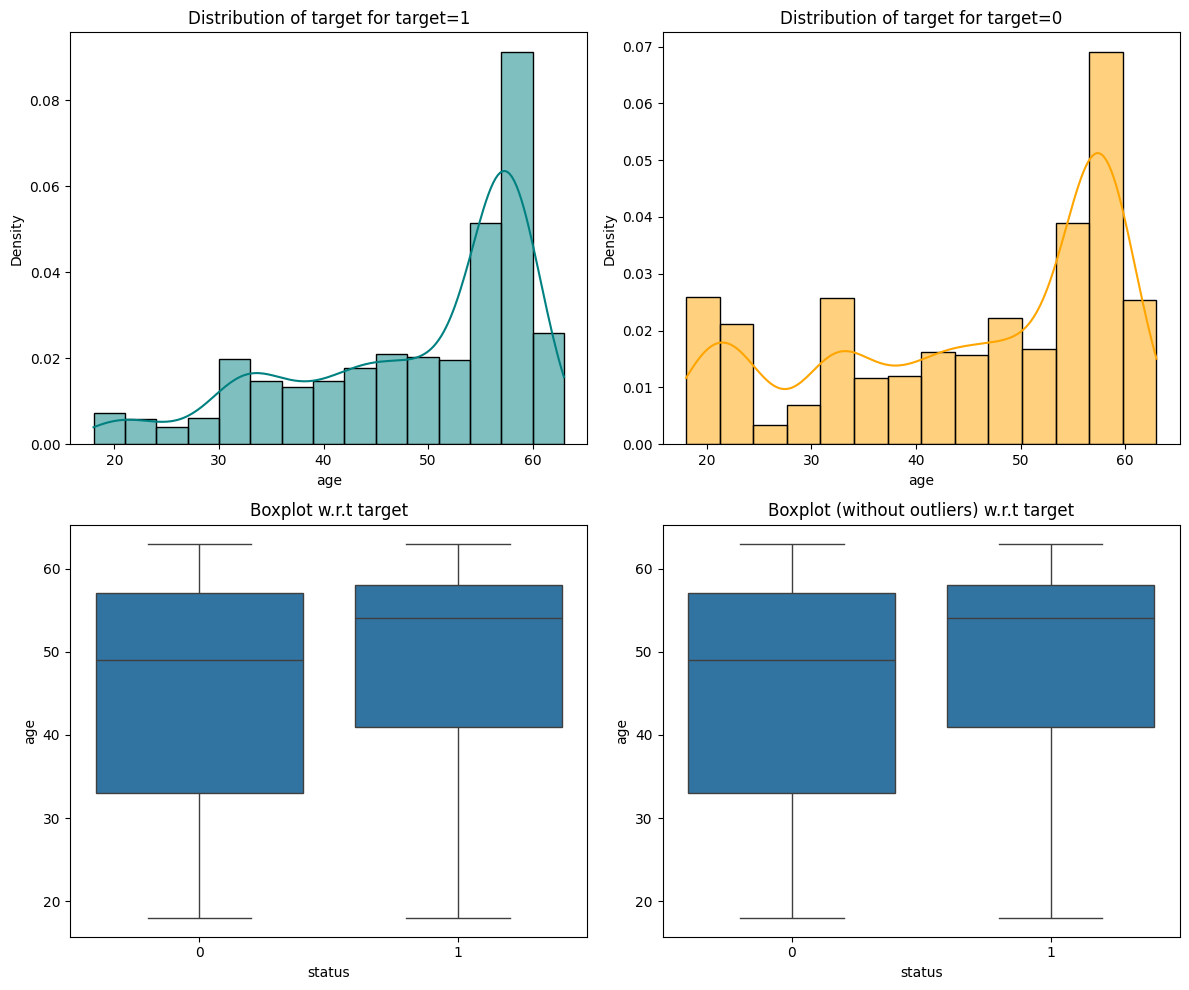

In [ ]:
distribution_plot_wrt_target(data, 'age', 'status')


The age distributions are very similar for both converted and non-converted leads, and both are left-skewed.

#### Website Visits

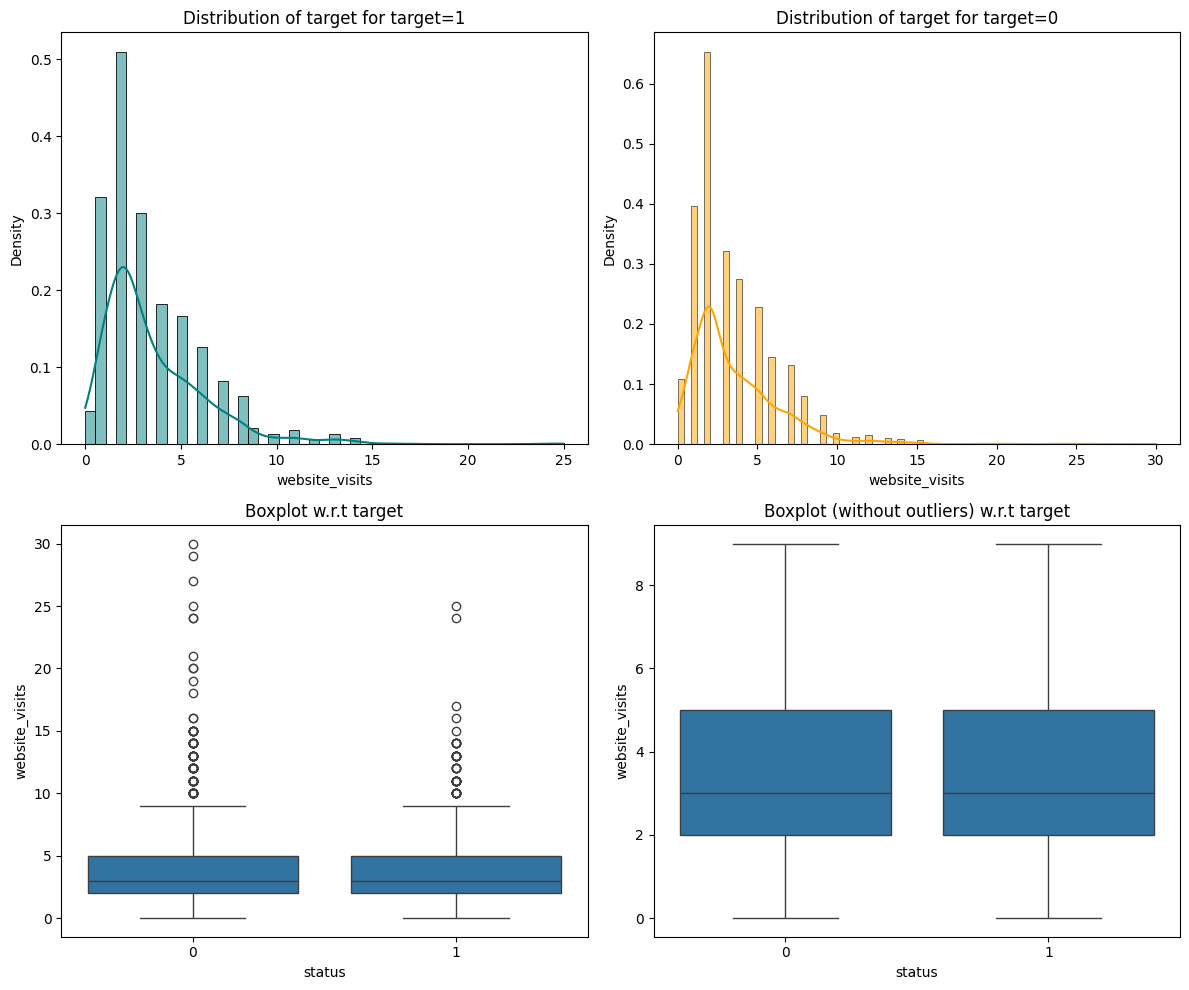

In [ ]:
distribution_plot_wrt_target(data, 'website_visits', 'status')


The website visits distribution for converted and non-converted leads are similar, but non-converted leads have more outliers on the higher end. Both are right-skewed.

#### Time Spent on Website

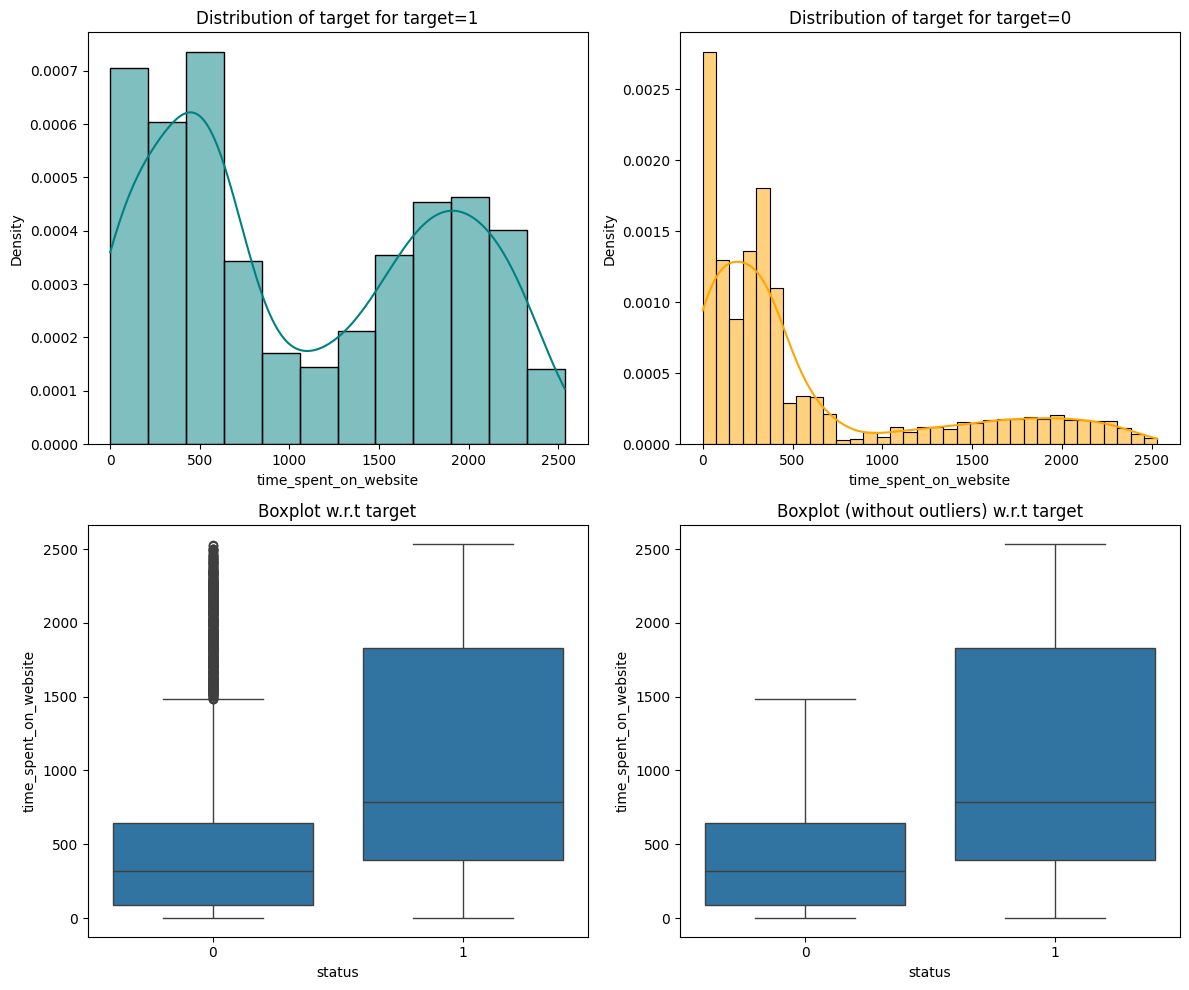

In [ ]:
distribution_plot_wrt_target(data, 'time_spent_on_website', 'status')


The distribution of time spent on website is right-skewed among non-converted leads compared to converted leads. The non-converted leads dataset also shows more outliers on the high end.

#### Page Views per Visit

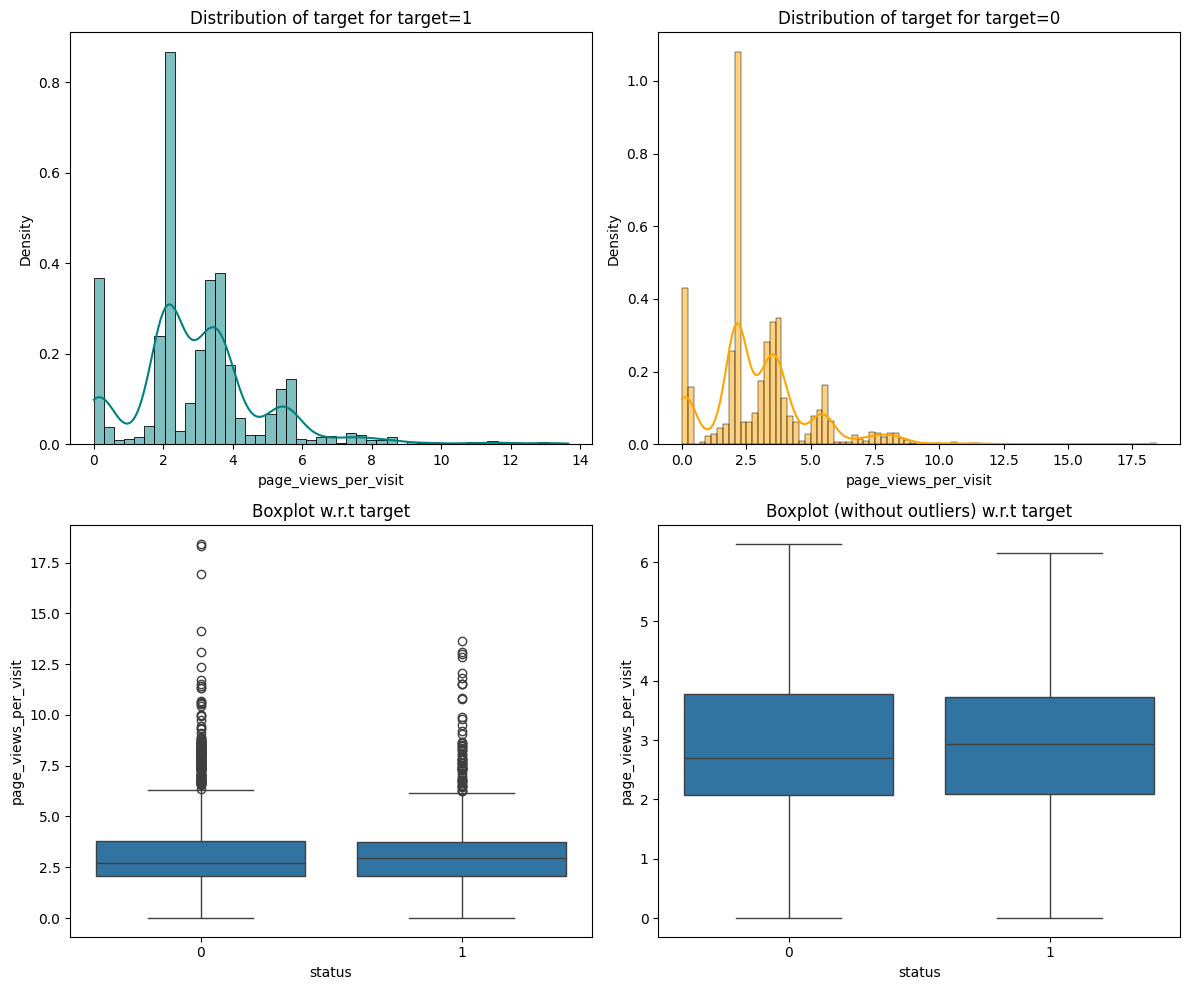

In [ ]:
distribution_plot_wrt_target(data, 'page_views_per_visit', 'status')


The distribution of page views per visit is similar among converted and non-converted leads, but there are more outliers on the high end among non-converted leads compared to converted leads.

#### Heatmap

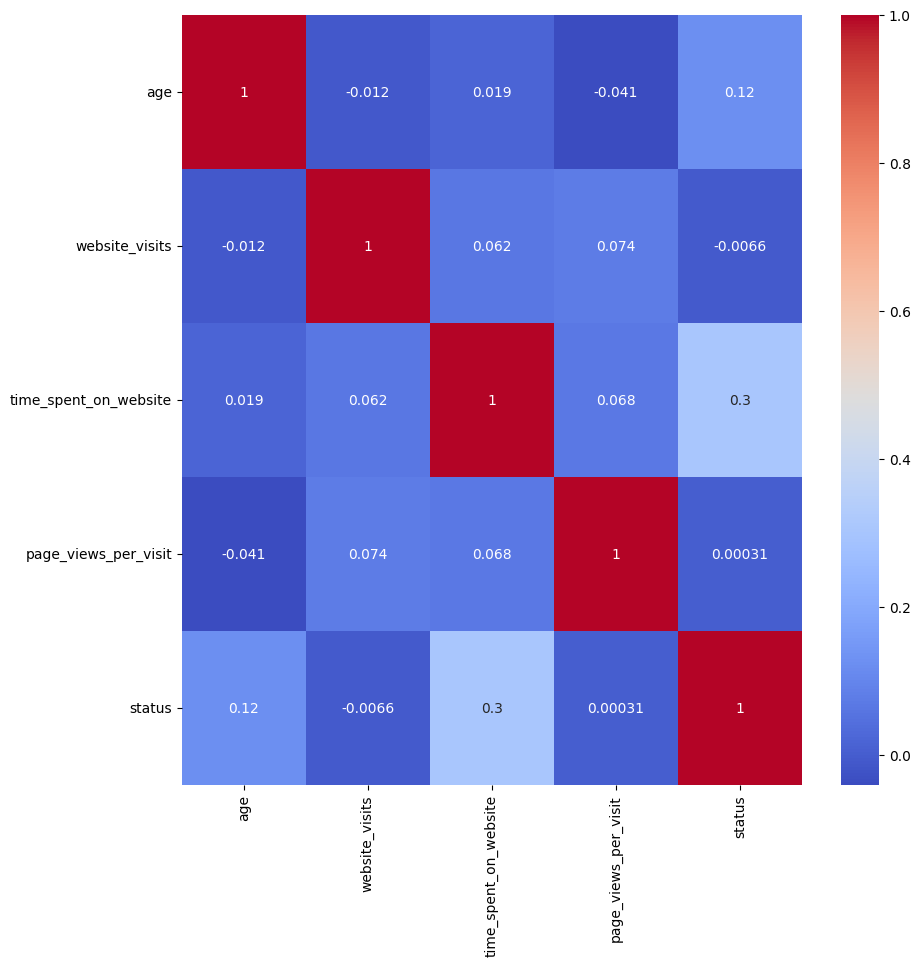

In [ ]:
# define list of variables to plot
numeric_features = df.select_dtypes(exclude = ['object']).columns.tolist()

#make the heatmap
plt.figure(figsize = (10, 10))
corr = df[numeric_features].corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = '.2g');

None of the numeric variables appear to show significant correlation with the target variable.

#### Pairplot

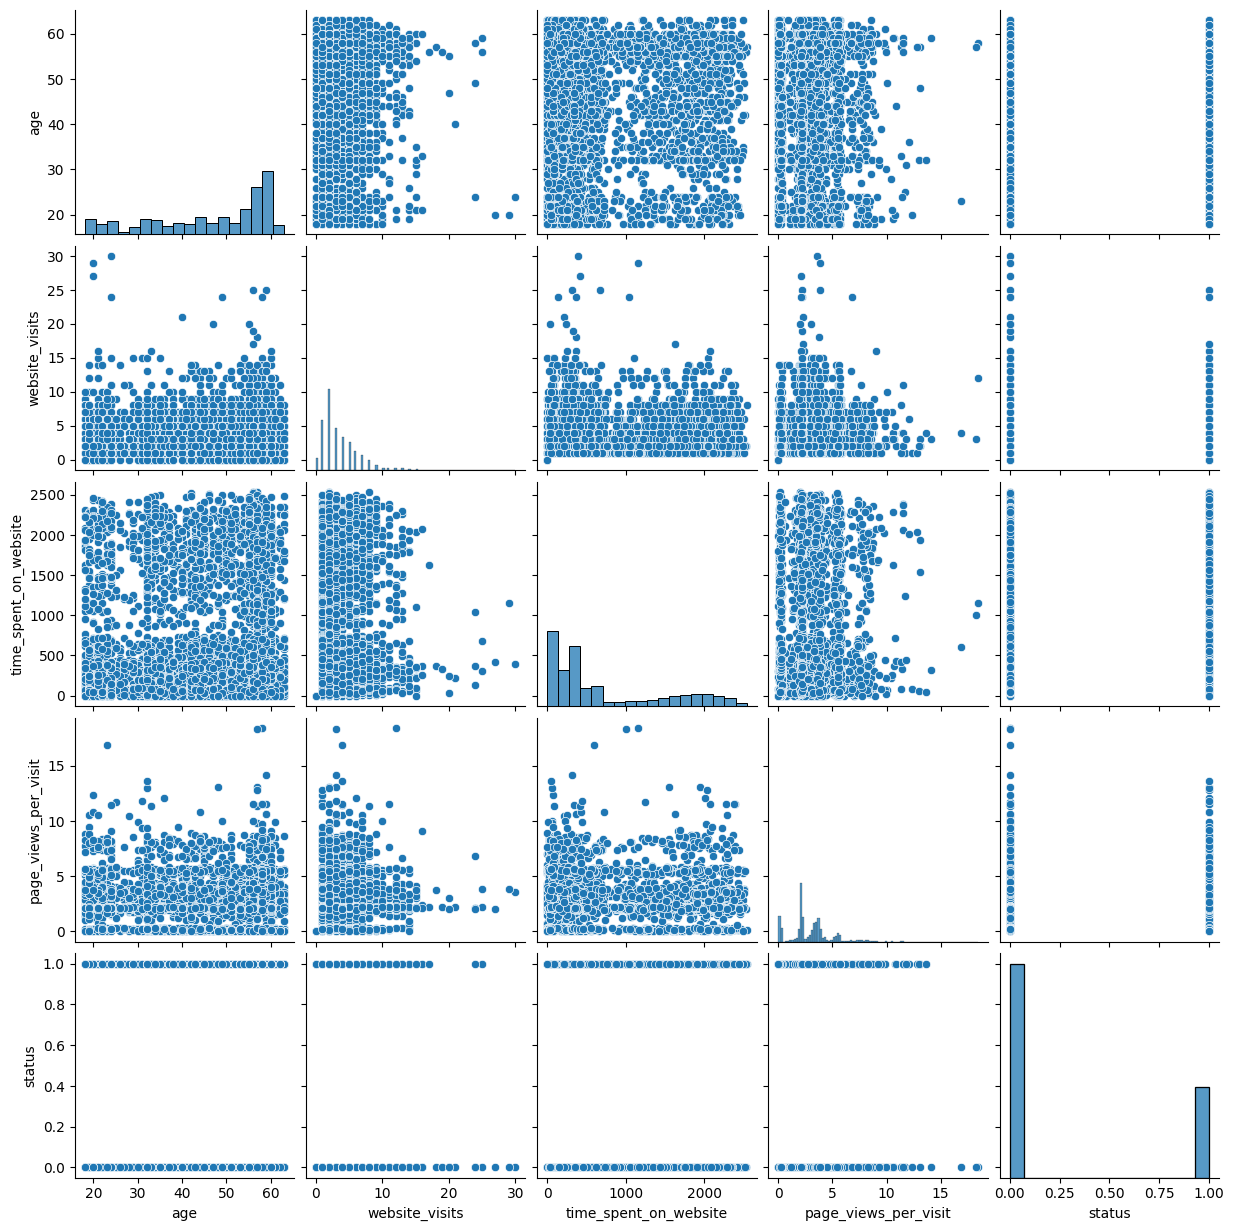

In [ ]:
#pairplots
sns.pairplot(data=df, vars = numeric_features);

The pairplots show the same -- not much correlation among the numeric variables with the target variable.

# **Data Preprocessing**

## Outlier Check

As we saw during EDA, only Website Visits and Page Views per Visit have outliers.

### Website Visits

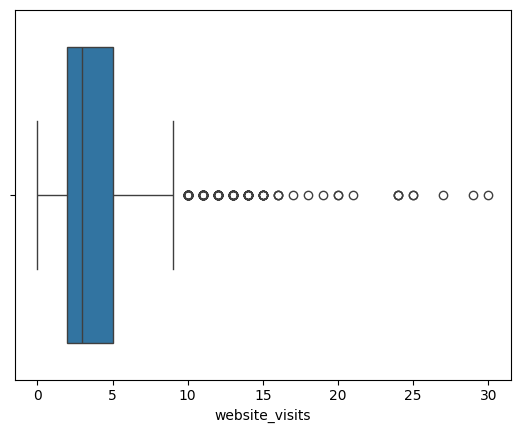

In [ ]:
sns.boxplot(data=df, x = 'website_visits');

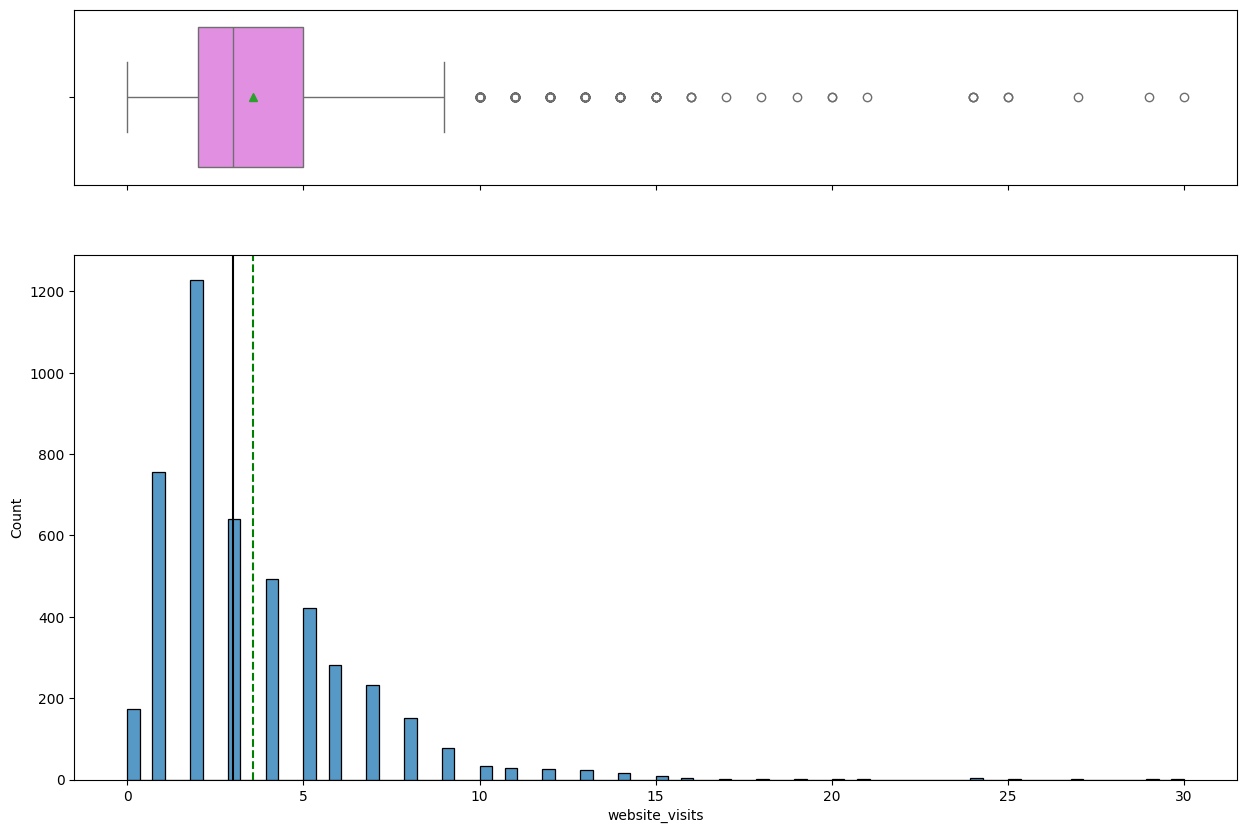

In [ ]:
histogram_boxplot(df, 'website_visits')

In [ ]:
#identify upper and lower whiskers, beyond which datapoints are outliers
q1 = df['website_visits'].quantile(0.25)
q3 = df['website_visits'].quantile(0.75)
iqr = q3-q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
print("Upper whisker: ", upper_whisker, "Lower whisker: ", lower_whisker)

Upper whisker:  9.5 Lower whisker:  -2.5


In [ ]:
float(df['website_visits'].mean())

3.566782307025152

In [ ]:
df['website_visits'].median()

3.0

There is a difference of 0.56 between the mean and the median, which isn't too dramatic. That said, we'll leave the outliers as they are.

### Page Views per Visit

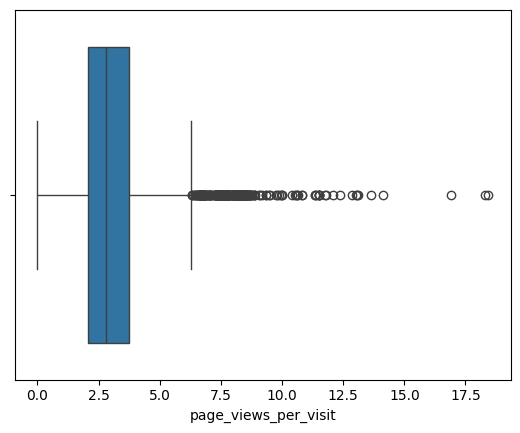

In [ ]:
sns.boxplot(data=df, x = 'page_views_per_visit');

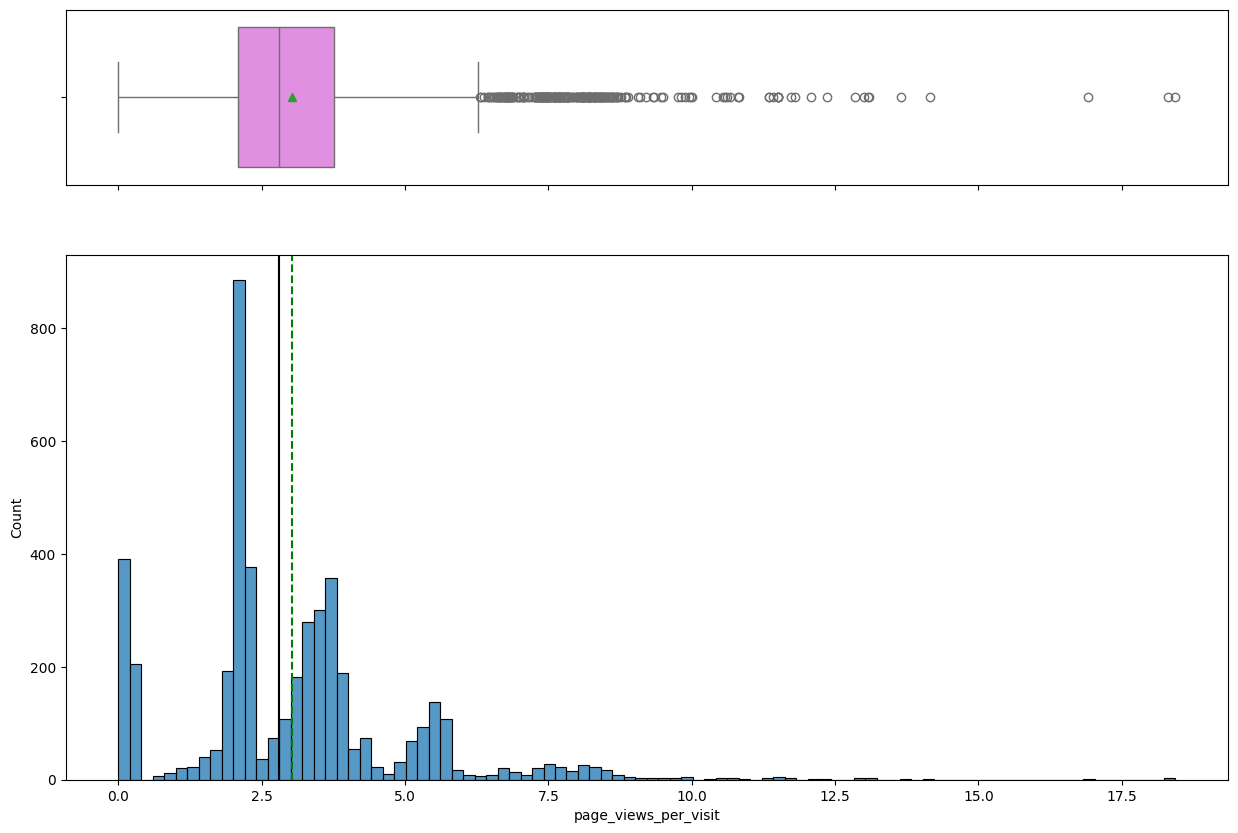

In [ ]:
histogram_boxplot(df, 'page_views_per_visit')

In [ ]:
#identify upper and lower whiskers, beyond which datapoints are outliers
q1 = df['page_views_per_visit'].quantile(0.25)
q3 = df['page_views_per_visit'].quantile(0.75)
iqr = q3-q1
upper_whisker = q3 + 1.5 * iqr
lower_whisker = q1 - 1.5 * iqr
print("Upper whisker: ", upper_whisker, "Lower whisker: ", lower_whisker)

Upper whisker:  6.273999999999999 Lower whisker:  -0.4399999999999995


In [ ]:
float(df['page_views_per_visit'].mean())

3.0261255420641806

In [ ]:
df['page_views_per_visit'].median()

2.792

There is a difference of about 0.234 between the mean and the median, which isn't too dramatic. That said, we'll leave the outliers as they are.

## Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

* No variables stand out as needing feature engineering before moving forward.

In [ ]:
#separate vars by data types
num_features = df.select_dtypes(exclude = ['object']).columns.tolist()
cat_features = df.select_dtypes(exclude = ['number']).columns.tolist()

In [ ]:
#drop ID and the target var from our list
cat_features.remove('ID')
num_features.remove('status')

In [ ]:
# Define predictor matrix X with the numeric and cat features
X = df[numeric_features + cat_features]

# Define target variable
y = df['status']

In [ ]:
# Split the dataset
#temp and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#val and train:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = 42, stratify = y_temp)

#see how it looks
print(X_train.shape, X_val.shape, X_test.shape)

(2951, 14) (738, 14) (923, 14)


## **Data Pre-processing Pipeline**

In [ ]:
#make the pipeline
#impute median when vals are missing for num vars
#impute mode when vals are missing for cat vars
#ignore categories not seen during training time as 0
preprocessor = make_column_transformer(
    (Pipeline([('num_imputer', SimpleImputer(strategy='median')),
               ('scaler', StandardScaler())]), num_features),
    (Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')),
               ('encoder', OneHotEncoder(handle_unknown='ignore'))]), cat_features)
)

# **Model Building**

## Model Evaluation Criterion

- Mention the evaluation metric along with the reasoning

* We are trying to identify the leads that are ripe for conversion to paid customers.
* Paid customers are the positive class, since they have 1 as their status.
* False positives would be leads identified as likely to convert but wouldn't actually convert, while false negatives are leads identified as unlikely to convert but would convert.
* Identifying a lead as unlikely to convert when they would (false negative) is more costly (missing out on a potential customer) than identifying a lead as likely to convert when they wouldn't (false positive) (wasting time/energy on a lead that won't convert).
* Thus we want to minimize false negatives, so our metric should be recall.

## Define functions for Model Evaluation

In [ ]:
# Function to compute different metrics to check performance of a classification model
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classifier model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
#Defining dataframe columns
columns = ["model",
           "Accuracy",
           "Recall",
           "Precision",
           "F1"
           ]

#Creating a pandas dataframe
results = pd.DataFrame(columns=columns)

## Random Forest Model (Model 1)

In [ ]:
#set up the classifier
model_rf = RandomForestClassifier(random_state = 1, class_weight = 'balanced')

In [ ]:
#make pipeline with preprocessinig and training
model1 = make_pipeline(preprocessor, model_rf)

In [ ]:
#train the model
model1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'website_visits',
                                                   'time_spent_on_website',
                                                   'page_views_per_visit']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['current_occupation',
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=1))])

### Checking model performance on training set

In [ ]:
#see how model did on training set
model_performance_classification(model1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.999661,1.0,0.998866,0.999433


### Checking model performance on val set

In [ ]:
#see how model did on val set
model1_scores = model_performance_classification(model1, X_val, y_val)
model1_scores

,Accuracy,Recall,Precision,F1
0,0.848238,0.690909,0.77551,0.730769


Model1 appears to overfit, as we achieved perfect recall on training but a recall of .69 on the val set.

## AdaBoost Classifier (Model 2)

In [ ]:
#set up the classifier
model_ada = AdaBoostClassifier(random_state = 1)

In [ ]:
#make pipeline with preprocessinig and training
model2 = make_pipeline(preprocessor, model_ada)

In [ ]:
#train the model
model2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'website_visits',
                                                   'time_spent_on_website',
                                                   'page_views_per_visit']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['current_occupation',
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=1))])

### Checking model performance on training set

In [ ]:
#see how model did on training set
model_performance_classification(model2, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.824466,0.645857,0.734194,0.687198


### Checking model performance on val set

In [ ]:
#see how model did on val set
model2_scores = model_performance_classification(model2, X_val, y_val)
model2_scores

,Accuracy,Recall,Precision,F1
0,0.807588,0.627273,0.69697,0.660287


AdaBoost didn't perform very well on the training set, and had a lower recall score on the val set. The lower training set score suggests it's not overfitting like Random Forest did.

# **Model Performance Improvement - Hyperparameter Tuning**

## Hyperparameter Tuning - Random Forest (Model 3)

In [ ]:
%%time

#define the model
rf_base = RandomForestClassifier(random_state = 1)
rftuning = make_pipeline(preprocessor, rf_base)


#defining scorer
scorer = metrics.make_scorer(metrics.recall_score)

#parameter grid for random search -- added randomforestclassifier__
#so they get fed to the classifier within the pipeline correctly
param_grid = {
    'randomforestclassifier__n_estimators': np.arange(50, 150, 25),
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 5, 10],
    'randomforestclassifier__max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.9],
    'randomforestclassifier__max_samples': np.arange(0.5, 1.0, 0.1),
    'randomforestclassifier__max_depth': np.arange(1, 5, 1),
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample']
              }
#call randomized search
randomized_cv = RandomizedSearchCV(estimator = rftuning, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 5, random_state = 1, verbose = 2)

#fit parameters in randomized search
randomized_cv.fit(X_train, y_train)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'randomforestclassifier__n_estimators': np.int64(100), 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_samples': np.float64(0.5), 'randomforestclassifier__max_features': None, 'randomforestclassifier__max_depth': np.int64(3), 'randomforestclassifier__class_weight': 'balanced_subsample'} with CV score=0.8956022085259374:
CPU times: user 2.07 s, sys: 175 ms, total: 2.25 s
Wall time: 1min 20s


In [ ]:
#put the best model in model 3
model3 = randomized_cv.best_estimator_

### Checking model performance on training set

In [ ]:
#see how model did on training set
model_performance_classification(model3, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.799729,0.905789,0.611026,0.729767


### Checking model performance on val set

In [ ]:
#see how model did on val set
model3_scores = model_performance_classification(model3, X_val, y_val)
model3_scores

,Accuracy,Recall,Precision,F1
0,0.777778,0.868182,0.58589,0.699634


Recall fell on the training set compared to the vanilla model (which is to be expected, since the vanilla model overfit and had a perfect score), but had a respectable performance on the validation set.

## Hyperparameter Tuning - AdaBoost Classifier (Model 4)

In [ ]:
%%time

#define the model
ada_base = AdaBoostClassifier(random_state = 1)
adatuning = make_pipeline(preprocessor, ada_base)

#parameter grid for random search
param_grid = {
    'adaboostclassifier__n_estimators': np.arange(50, 150, 10),
    'adaboostclassifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'adaboostclassifier__estimator': [
        DecisionTreeClassifier(max_depth = 1, random_state = 1),
        DecisionTreeClassifier(max_depth = 2, random_state = 1),
        DecisionTreeClassifier(max_depth = 3, random_state = 1)]
              }
#call randomized search
randomized_cv = RandomizedSearchCV(estimator = adatuning, param_distributions = param_grid, n_jobs = -1, n_iter = 50, scoring = scorer, cv = 5, random_state = 1, verbose = 2)
#set n_jobs = 1 because Colab returned an error saying "a task failed to unserialize" and suggested making that change

#fit parameters in randomized search
randomized_cv.fit(X_train, y_train)

#show the best parameters
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'adaboostclassifier__n_estimators': np.int64(60), 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7843027734976888:
CPU times: user 2.2 s, sys: 179 ms, total: 2.38 s
Wall time: 2min 12s


In [ ]:
#put the best model in model 4
model4 = randomized_cv.best_estimator_

### Checking model performance on val set

In [ ]:
#see how model did on training set
model_performance_classification(model4, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.829549,0.796822,0.684211,0.736235


### Checking model performance on val set

In [ ]:
#see how model did on val set
model4_scores = model_performance_classification(model4, X_val, y_val)
model4_scores

,Accuracy,Recall,Precision,F1
0,0.814363,0.763636,0.664032,0.710359


The tuned model's training and val scores showed improvement from the vanilla model.

# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
results = pd.concat(
    [
        model1_scores.T,
        model2_scores.T,
        model3_scores.T,
        model4_scores.T
    ],
    axis = 1
)
results.columns = [
    "Random Forest Vanilla",
    "AdaBoost Vanilla",
    "Random Forest Tuned",
    "AdaBoost Tuned"
]
results

,Random Forest Vanilla,AdaBoost Vanilla,Random Forest Tuned,AdaBoost Tuned
Accuracy,0.848238,0.807588,0.777778,0.814363
Recall,0.690909,0.627273,0.868182,0.763636
Precision,0.775510,0.696970,0.585890,0.664032
F1,0.730769,0.660287,0.699634,0.710359


Random Forest Tuned (Model 3) had the best recall on the val set (and generalized well), so we'll go with that.

In [ ]:
#run model 3 on the test set
model_performance_classification(model3, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.807151,0.880435,0.626289,0.731928


Model 3 achieved a recall of 0.88 on the test set, which is good.

In [ ]:
#folder for backend server deployment files
os.makedirs("backend_files", exist_ok=True)

In [ ]:
#path to save model and preprocessing steps
saved_model_path = "backend_files/lead_conversion_prediction_model_v1_0.joblib"

In [ ]:
#save our best model using joblib
joblib.dump(model3, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/lead_conversion_prediction_model_v1_0.joblib


In [ ]:
#check that the model saved
saved_model = joblib.load("backend_files/lead_conversion_prediction_model_v1_0.joblib")
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
#load the saved model
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'website_visits',
                                                   'time_spent_on_website',
                                                   'page_views_per_visit']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   On...
                                                   'first_interaction',
                                                   'profile_completed',
                                                   'last_activity',
                                                   'print_media_type1',
                                                   'print_media_type2',
                                                   'digital_media',
                                                   'educational_channels',
                                                   'referral'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=np.int64(3),
                                        max_features=None,
                                        max_samples=np.float64(0.5),
                                        min_samples_leaf=4,
                                        n_estimators=np.int64(100),
                                        random_state=1))])

In [ ]:
#make predictions with the test set using the deserialized model
saved_model.predict(X_test)


array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# **Deployment - Backend**

## Flask Web Framework


In [ ]:
%%writefile backend_files/app.py
import joblib
import pandas as pd
from flask import Flask, request, jsonify

# Initialize Flask app with a name
lead_conversion_predictor_api = Flask("Lead Conversion Predictor")

# Load the trained churn prediction model
model = joblib.load("lead_conversion_prediction_model_v1_0.joblib")

# Define a route for the home page
@lead_conversion_predictor_api.get('/')
def home():
    return "Welcome to the Lead Conversion Prediction API!"

# Define an endpoint to predict conversion for a single lead
@lead_conversion_predictor_api.post('/v1/lead')
def predict_conversion():
    # Get JSON data from the request
    lead_data = request.get_json()

    # Extract relevant lead features from the input data
    sample = {
        'age': lead_data['age'],
        'current_occupation': lead_data['current_occupation'],
        'first_interaction': lead_data['first_interaction'],
        'profile_completed': lead_data['profile_completed'],
        'website_visits': lead_data['website_visits'],
        'time_spent_on_website': lead_data['time_spent_on_website'],
        'page_views_per_visit': lead_data['page_views_per_visit'],
        'last_activity': lead_data['last_activity'],
        'print_media_type1': lead_data['print_media_type1'],
        'print_media_type2': lead_data['print_media_type2'],
        'digital_media': lead_data['digital_media'],
        'educational_channels': lead_data['educational_channels'],
        'referral': lead_data['referral']
    }

    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a churn prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Map prediction result to a human-readable label
    prediction_label = "will convert" if prediction == 1 else "won't convert"

    # Return the prediction as a JSON response
    return jsonify({'Prediction': prediction_label})

# Define an endpoint to predict churn for a batch of leads
@lead_conversion_predictor_api.post('/v1/leadbatch')
def predict_conversion_batch():
    # Get the uploaded CSV file from the request
    file = request.files['file']

    # Read the file into a DataFrame
    input_data = pd.read_csv(file)

    # Make predictions for the batch data and convert raw predictions into a readable format
    predictions = [
        'Will Convert' if x == 1
        else "Won't Convert"
        for x in model.predict(input_data.drop("ID",axis=1)).tolist()
    ]

    lead_id_list = input_data.ID.values.tolist()
    output_dict = dict(zip(lead_id_list, predictions))

    return output_dict

# Run the Flask app in debug mode
if __name__ == '__main__':
    app.run(debug=True)

Writing backend_files/app.py


## Dependencies File

In [ ]:
#Check the versions of the key libraries we're using
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"joblib version: {joblib.__version__}")
print(f"streamlit version: {st.__version__}")


pandas version: 2.2.2
numpy version: 2.0.2
scikit-learn version: 1.6.1
joblib version: 1.4.2
streamlit version: 1.50.0


In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
joblib==1.4.2
streamlit==1.50.0
flask==2.2.2
gunicorn==20.1.0
Werkzeug==2.2.2

Writing backend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:lead_conversion_predictor_api"]

Writing backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

**Note**: We are creating a Hugging Face Docker Space for our backend using the Hugging Face Hub API. This automates the space creation process and enables seamless deployment of our Flask app.

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

#ACCESS KEY REDACTED # Your Hugging Face token created from access keys in write mode
repo_id = "verychrisp/LeadPredictionBackend"  # Your Hugging Face space id

#log into hugging face
login(token=access_key)

**Note :** If you were trying with different names, be cautious when using a underscore `_` in space names, such as `frontend_space`, as it can cause exceptions when accessing the API. Always use an hyphen `-` instead, like `frontend-space`.

## Uploading Files to Hugging Face Space (Docker Space)

**Note**: Before running the code below, ensure that the serialized ML model has been uploaded in to `backend_files` folder.

In [ ]:
# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Uploading...:   0%|          | 0.00/176k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/verychrisp/LeadPredictionBackend/commit/9ff299fb02286ca72b5ab0ce93874909c323fc52', commit_message='Upload folder using huggingface_hub', commit_description='', oid='9ff299fb02286ca72b5ab0ce93874909c323fc52', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/verychrisp/LeadPredictionBackend', endpoint='https://huggingface.co', repo_type='space', repo_id='verychrisp/LeadPredictionBackend'), pr_revision=None, pr_num=None)

Hugging Face Spaces backend link:

- https://huggingface.co/spaces/verychrisp/LeadPredictionBackend

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [ ]:
#checking requests version for dependencies file later
print(f"requests version: {requests.__version__}")

requests version: 2.32.3


In [ ]:
#folder for frontend files
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/app.py
import streamlit as st
import pandas as pd
import requests

# Set the title of the Streamlit app
st.title("Lead Conversion Prediction")

# Section for online prediction
st.subheader("Online Prediction")

#collect input
ID = st.number_input("Lead ID", min_value=1, help="This ID is for display purposes only.")
age = st.number_input("Age", min_value=0, max_value=120)
current_occupation = st.selectbox("Current Occupation", ["Professional", "Unemployed", "Student"])
first_interaction = st.selectbox("First Interaction", ["Website", "Mobile app"])
profile_completed = st.selectbox("Profile Completion", ["Low", "Medium", "High"])
website_visits = st.number_input("Website Visits", min_value=0, max_value=99999999, value = 3)
time_spent_on_website = st.number_input("Time Spent on Website (in seconds)", min_value=0, max_value=99999999, value = 700)
page_views_per_visit = st.number_input("Page Views per Visit", min_value=0, max_value=99999999, value = 3)
last_activity = st.selectbox("Last Activity", ["Website activity", "Email activity", "Phone activity"])
print_media_type1 = st.selectbox("Ad seen in newspaper?", ["No", "Yes"])
print_media_type2 = st.selectbox("Ad seen in magazine?", ["No", "Yes"])
digital_media = st.selectbox("Ad seen on digital media?", ["No", "Yes"])
educational_channels = st.selectbox("Ad seen on educational channels?", ["No", "Yes"])
referral = st.selectbox("Is the lead a referral?", ["No", "Yes"])

# Make prediction when the "Predict" button is clicked
if st.button("Predict", type='primary'):

#put input into a dictionary after predict button is used
  input_data = {'age': age, 'current_occupation': current_occupation,
                'first_interaction': first_interaction,
                'profile_completed': profile_completed,
                'website_visits': website_visits,
                'time_spent_on_website': time_spent_on_website,
                'page_views_per_visit': page_views_per_visit,
                'last_activity': last_activity,
                'print_media_type1': print_media_type1,
                'print_media_type2': print_media_type2,
                'digital_media': digital_media,
                'educational_channels': educational_channels,
                'referral': referral}
  response = requests.post("https://verychrisp-LeadPredictionBackend.hf.space/v1/lead", json=input_data)    # enter user name and space name before running the cell

  if response.status_code == 200:
    result = response.json()
    conversion_prediction = result["Prediction"]  # Extract only the value
    st.write(f"Based on the information provided, the lead with ID {ID} likely {conversion_prediction}.")
  else:
    st.error("Error in API request")

# Batch Prediction
st.subheader("Batch Prediction")

file = st.file_uploader("Upload CSV file", type=["csv"])
if file is not None:
  if st.button("Predict for Batch", type='primary'):
    response = requests.post("https://verychrisp-LeadPredictionBackend.hf.space/v1/leadbatch", files={"file": file})    # enter user name and space name before running the cell
    if response.status_code == 200:
      result = response.json()
      st.header("Batch Prediction Results")
      st.write(result)
    else:
      st.error("Error in API request")

Writing frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
streamlit==1.50.0
requests==2.32.3

Writing frontend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=7860", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false", "--browser.gatherUsageStats=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
#ACCESS KEY REDACTED # Your Hugging Face token created from access keys in write mode
repo_id = "verychrisp/LeadPredictionFrontend"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/verychrisp/LeadPredictionFrontend/commit/dfad09a6db15b2247e1cb20eedf1f09e25bce105', commit_message='Upload folder using huggingface_hub', commit_description='', oid='dfad09a6db15b2247e1cb20eedf1f09e25bce105', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/verychrisp/LeadPredictionFrontend', endpoint='https://huggingface.co', repo_type='space', repo_id='verychrisp/LeadPredictionFrontend'), pr_revision=None, pr_num=None)

Hugging Face Spaces frontend link:
- https://huggingface.co/spaces/verychrisp/LeadPredictionFrontend



# **Actionable Insights and Business Recommendations**

 - The tuned Random Forest model could be further tuned to achieve a higher recall; we achieved 0.88 on the test set, which while good, does show some room for improvement.
 - Additionally, more models could be built and tested -- XGBoost, neural networks, etc. These may achieve higher performance.
 - The typical lead’s profile is 46 years old, a professional, had their first interaction online, has completed most of the online profile, has visited the website 3 times and spent 743 seconds on the website looking at around 2 pages during each visit, had their last interaction with ExtraaLearn via email, has not seen ads on any media, and has not been referred.
- Most leads have not been converted to paying customers – non-conversions outnumber conversions by a more than 2:1 ratio.
- The vast majority of leads have not seen ads on print media, digital media, and educational channels. Additionally, leads who have and haven’t seen the ads have very similar conversion rates. This suggests efforts/money spent on that advertising may not be yielding much in the way of results, and could be spent elsewhere.
- When it comes to the current occupation of leads, professionals have a higher conversion rate than unemployed and student leads – meaning more effort should be spent on professional leads.
- Leads who had their first interaction on the website also have high conversion rates compared to those who had their first interaction with the app – meaning more effort should be spent on those leads.
- Unsurprisingly, leads who have a high amount of profile completion also have a high rate of conversion – meaning more effort should be spent on those leads.
- Leads who had their last interaction with ExtraaLearn through the website had higher conversion rates compared to those who had their last interaction via email or phone activity – meaning more effort should be spent on those leads.
- Leads who were referrals had the highest conversion rate among the categorical variables – more than half of leads who were referred became paying customers – so extra effort should be spent on those leads in particular. Given that no numerical variables showed correlation with the target variable, referral could be the strongest predictor of conversion.
- Bottom line -- the best candidates to target for conversion are professionals, had their first and latest interaction through the website, have a high amount of profile completion, and most especially, are referrals.
- Since referrals are such a strong indicator of possible conversion, ExtraaLearn could offer referral bonuses to its current students for referring new students to the platform.


#<font size=6 color='blue'>Power Ahead</font>
___